In [ ]:
# load in libraries we will use later
try:
  from networkx import Graph
except:
  !pip install networkx
  !pip install matplotlib
  from networkx import Graph
  from networkx import draw_networkx as draw

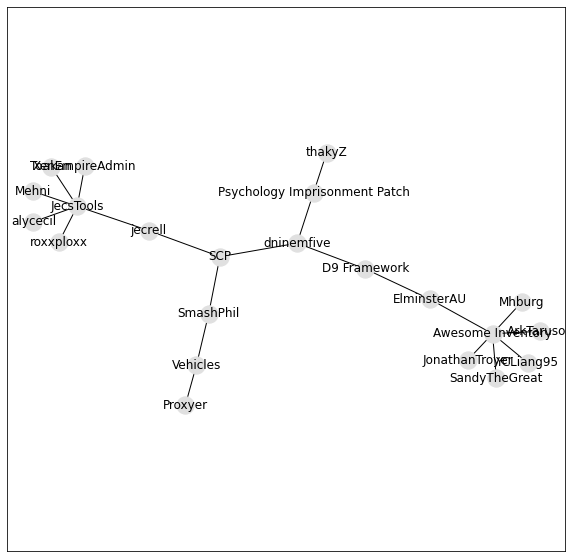

In [ ]:
# test graph drawing
from networkx import draw_networkx as draw
import matplotlib.pyplot as plt
G = Graph()
G.add_node('dninemfive')
G.add_node('D9 Framework')
G.add_edge('dninemfive', 'D9 Framework')
G.add_edge('ElminsterAU', 'D9 Framework')
G.add_node('Awesome Inventory')
G.add_edge('ElminsterAU', 'Awesome Inventory')
G.add_edge('Mhburg', 'Awesome Inventory')
G.add_edge('SandyTheGreat', 'Awesome Inventory')
G.add_edge('YCLiang95', 'Awesome Inventory')
G.add_edge('JonathanTroyer', 'Awesome Inventory')
G.add_edge('ArkTarusov', 'Awesome Inventory')
G.add_node('Psychology Imprisonment Patch')
G.add_edge('dninemfive', 'Psychology Imprisonment Patch')
G.add_node('thakyZ')
G.add_edge('thakyZ', 'Psychology Imprisonment Patch')
G.add_node('SCP')
G.add_edge('dninemfive', 'SCP')
G.add_edge('SmashPhil', 'SCP')
G.add_edge('jecrell', 'SCP')
G.add_edge('jecrell', 'JecsTools')
G.add_edge('JecsTools', 'alycecil')
G.add_edge('JecsTools', 'roxxploxx')
G.add_edge('JecsTools', 'Toakan')
G.add_edge('JecsTools', 'XenEmpireAdmin')
G.add_edge('JecsTools', 'Mehni')
G.add_edge('Vehicles', 'SmashPhil')
G.add_edge('Vehicles', 'Proxyer')
plt.figure(figsize=(10,10))
draw(G, node_color='#e0e0e0')
plt.axis("equal")
plt.show()

In [ ]:
# test github API
import requests
import json
import getpass
username = input("Input username: ")
token = getpass.getpass("Input OAuth token: ")
response = requests.get('https://api.github.com/users/dninemfive/repos', {'type': 'all'}, auth=(username, token))
if response.status_code == 200:
  jsn = json.loads(response.text)
  for repo in jsn:
    # print(repo['name'])
    if repo['name'] == 'simplebulkproduction':
      print(json.loads(requests.get(repo['contributors_url'], {'affiliation': 'all'}, auth=(username, token)).text))
else: print("Response: " + response.status_code)

Input username: dninemfive
Input OAuth token: ··········
[{'login': 'dninemfive', 'id': 11084010, 'node_id': 'MDQ6VXNlcjExMDg0MDEw', 'avatar_url': 'https://avatars0.githubusercontent.com/u/11084010?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/dninemfive', 'html_url': 'https://github.com/dninemfive', 'followers_url': 'https://api.github.com/users/dninemfive/followers', 'following_url': 'https://api.github.com/users/dninemfive/following{/other_user}', 'gists_url': 'https://api.github.com/users/dninemfive/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/dninemfive/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/dninemfive/subscriptions', 'organizations_url': 'https://api.github.com/users/dninemfive/orgs', 'repos_url': 'https://api.github.com/users/dninemfive/repos', 'events_url': 'https://api.github.com/users/dninemfive/events{/privacy}', 'received_events_url': 'https://api.github.com/users/dninemfive/received_events', 'type': 'Us

In [ ]:
# actually construct network graph
from networkx import draw_networkx as draw
from networkx import Graph
import networkx as nx
import matplotlib.pyplot as plt
import requests
import json
import getpass
import numbers
import math

def get_collaborators(user, degrees_remaining):
  pass

def get_repos(url, min_contributors=2):
  """Takes a Github repo url and returns a list of Repo objects, discarding any with fewer contributors than min_contributors."""
  print('getting repos from ' + url + '...')
  response = requests.get(url, {'type': 'all'}, auth=(username, token))
  print('\tresponse received.')
  jason = json.loads(response.text)
  repos = []
  print('\tprocessing...')
  for j in jason:
    temp = Repo(j)
    print('\t\t' + repr(temp))
    if temp.num_contributors >= min_contributors: repos.append(temp)
  print('done!')
  return repos

class Repo:
  def __init__(self, jsn):
    self.name = jsn['name']
    self.contributors = []
    for userJsn in json.loads(requests.get(jsn['contributors_url'], {'affiliation': 'all'}, auth=(username, token)).text):
      self.contributors.append(User(userJsn))

  def __repr__(self):
    return 'Repo ' + self.name + ', contributors: ' + repr(self.contributors)

  @property
  def name_for_graph(self):
    return 'r ' + self.name

  @property
  def num_contributors(self):
    return len(self.contributors)

class User:
  def __init__(self, jsn):
    self.name = jsn['login']
    self.repos_url = jsn['repos_url']
  
  def __repr__(self):
    return "User " + self.name

  @property
  def name_for_graph(self):
    return 'u ' + self.name

def already_profiled(user):
  for cur in profiled_users:
    if user.name == cur: return True
  return False

# TODO: input validation. Verify that target user exists and that max_degrees is a number.
# Also, make sure username and OAuth are valid before continuing
username = input("Input your username: ")
token = getpass.getpass("Input OAuth token: ")
target_user = input("Input target user: ")
max_depth = int(input("Input degrees of relation to search: "))
g = Graph()
reposet, userset, profiled_users = set(), set(), set()
users_to_profile_next = set([target_user])
for depth in range(max_depth):
  print('depth ' + str(depth))
  users_to_profile = users_to_profile_next
  users_to_profile_next = set()
  for cur_target in users_to_profile:
    profiled_users.add(cur_target)
    for repo in get_repos('https://api.github.com/users/' + cur_target + '/repos'):
      reposet.add(repo.name_for_graph)
      for user in repo.contributors:
        userset.add(user.name_for_graph)
        if not already_profiled(user): users_to_profile_next.add(user.name)
        g.add_edge(user.name_for_graph, repo.name_for_graph)
print('data collected.')
w = 4 * math.sqrt(len(g))
h = w
plt.figure(figsize=(w,h))
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, nodelist=reposet, node_color='#80ff80')
nx.draw_networkx_nodes(g, pos, nodelist=userset, node_color='#8080ff')
nx.draw_networkx_edges(g, pos, edge_color='#a0a0a0')
labels = {}
for r in reposet:
  labels[r] = r.replace('r ','',1)
for u in userset:
  labels[u] = u.replace('u ','',1)
nx.draw_networkx_labels(g, pos, labels)
plt.axis("equal")
plt.show()
# new plan:
# - Get all repos from target user
# - If no other contributors/forks, discard
# - If forked from any other repo or by any other user, add repo and other user to graph (treat forks as the same repo)
# - For each contributor, including fork relations, run recursively
# e.g. dninemfive: keep SCP, PsychologyImprisonmentPatch, D9 Framework; connect to Smash Phil/Odz/jecrell, run recursively for each; ditto for thakyZ and Elminster
# - keep going until *repo* depth = max_degrees (e.g. for 3 degrees, SCP -> jecrell -> JecsTools -> lbmaian -> DoorsExpanded -> Proxyer)
# will probably need to find an algo to avoid crossing labels/edges and minimize graph size. Maybe ego?